<a href="https://colab.research.google.com/github/rwheirhw/ML-Roadmap/blob/main/LinRegfromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class NormalFormRegression:
  def __init__(self):
    self.theta=None

  def fit(self,X,y):
    b = np.c_[np.ones((X.shape[0],1)),X]

    try:
      self.theta = np.linalg.inv(b.T@b)@b.T@y
    except np.linalg.LinAlgError:
      raise ValueError("The matrix X is non invertibe, Check for high correlation(multicollinearity) in features.")
    return self

  def predict(self,X):
    if self.theta is None:
            raise RuntimeError("The model is not fitted yet. Call fit() before predicting.")
    b = np.c_[np.ones((X.shape[0],1)),X]

    return b@self.theta

In [45]:
X = 25*np.random.rand(24,1)


In [46]:
#Trying to plot y as y=4+3x+k(noise)
y = 4+3*X+np.random.rand(24,1)

In [47]:
model = NormalFormRegression()

In [48]:
model.fit(X,y)

In [49]:
print("Learned Parameters (theta):")
print(f"Intercept (theta_0): {model.theta[0][0]:.4f}")
print(f"Slope (theta_1): {model.theta[1][0]:.4f}")

Learned Parameters (theta):
Intercept (theta_0): 4.6702
Slope (theta_1): 2.9857


In [50]:
X_new = np.array([[2],[6]])
y_pred = model.predict(X_new)
print("\nPredictions for new data points [[2], [6]]:")
print(y_pred)


Predictions for new data points [[2], [6]]:
[[10.64155821]
 [22.58437392]]


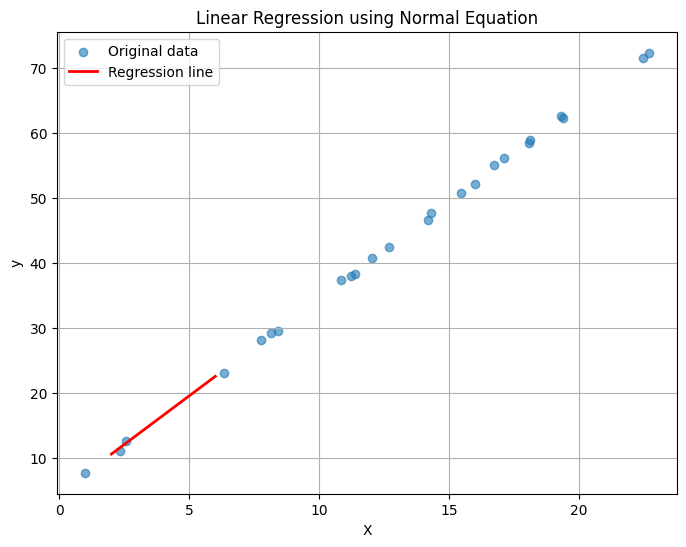

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.6, label='Original data')
plt.plot(X_new, y_pred, 'r-', linewidth=2, label='Regression line')
plt.title('Linear Regression using Normal Equation')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()